# Audio Processing

In [ ]:
!ls examples/

go_0a9f9af7_nohash_1.wav  stop_0b40aa8e_nohash_0.wav
go_0ab3b47d_nohash_0.wav  stop_0b56bcfe_nohash_1.wav


In [ ]:
import tensorflow as tf
import tensorflow_io as tfio

2023-10-13 13:03:04.393945: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-13 13:03:04.395879: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-13 13:03:04.432517: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-13 13:03:04.433304: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-13 13:03:05.171923: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [ ]:
filename = 'examples/go_0a9f9af7_nohash_1.wav'

In [ ]:
audio_io_tensor = tfio.audio.AudioIOTensor(filename)

shape = audio_io_tensor.shape
sampling_rate = audio_io_tensor.rate
resolution = audio_io_tensor.dtype

path_parts = tf.strings.split(filename, '/')
path_end = path_parts[-1]
file_parts = tf.strings.split(path_end, '_')
label = file_parts[0]

2023-10-13 13:03:06.129301: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX AVX2 AVX512F FMA
2023-10-13 13:03:06.131009: W tensorflow_io/core/kernels/audio_video_mp3_kernels.cc:271] libmp3lame.so.0 or lame functions are not available


In [ ]:
print('Label:', label.numpy().decode())
print('Audio shape:', shape)
print('Sampling rate:', sampling_rate)
print('Resolution', resolution)

import IPython
IPython.display.Audio(filename=filename, rate=sampling_rate)

Label: go
Audio shape: tf.Tensor([14336     1], shape=(2,), dtype=int64)
Sampling rate: tf.Tensor(16000, shape=(), dtype=int32)
Resolution <dtype: 'int16'>


# Channel selection/squeezing

In [ ]:
audio_tensor = audio_io_tensor.to_tensor()
audio_tensor = tf.squeeze(audio_tensor)
print('Audio shape:', audio_tensor.shape)

Audio shape: (14336,)


In [ ]:
import pandas as pd
import numpy as np

plot = {
    'Time': np.arange(audio_tensor.shape[0])[0::10],
    'Amplitude': audio_tensor.numpy().squeeze()[0::10]
}
plot_df = pd.DataFrame(plot)

In [ ]:
(lambda: DeepnoteChart(plot_df, """{"data":{"name":"placeholder"},"mark":{"type":"line","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Time","scale":{"type":"linear","zero":false}},"y":{"bin":false,"sort":null,"type":"quantitative","field":"Amplitude","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false},"legend":null}}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(plot_df, """{"data":{"name":"placeholder"},"mark":{"type":"line","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Time","scale":{"type":"linear","zero":false}},"y":{"bin":false,"sort":null,"type":"quantitative","field":"Amplitude","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false},"legend":null}}}"""))()

# Data Padding

In [ ]:
zero_padding = tf.zeros(sampling_rate - tf.shape(audio_tensor), dtype=resolution)
audio_padded = tf.concat([audio_tensor, zero_padding], axis=0)

print('Padded Audio shape:', audio_padded.shape)

plot = {
    'Time': np.arange(audio_padded.shape[0])[0::10],
    'Amplitude': audio_padded.numpy().squeeze()[0::10]
}
plot_df = pd.DataFrame(plot)

Padded Audio shape: (16000,)


In [ ]:
(lambda: DeepnoteChart(plot_df, """{"data":{"name":"placeholder"},"mark":{"type":"line","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Time","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Amplitude","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(plot_df, """{"data":{"name":"placeholder"},"mark":{"type":"line","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Time","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Amplitude","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}"""))()

# Resampling

In [ ]:
audio_8k = tfio.audio.resample(audio_padded, sampling_rate.numpy(), 8000)

print('Resampled Audio shape:', audio_8k.shape)

plot = {
    'Time': np.arange(audio_8k.shape[0])[0::10],
    'Amplitude': audio_8k.numpy().squeeze()[0::10]
}
plot_df = pd.DataFrame(plot)

Resampled Audio shape: (8000,)


In [ ]:
(lambda: DeepnoteChart(plot_df, """{"data":{"name":"placeholder"},"mark":{"type":"line","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Time","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Amplitude","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(plot_df, """{"data":{"name":"placeholder"},"mark":{"type":"line","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Time","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Amplitude","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}"""))()

# Normalization

In [ ]:
audio_float32 = tf.cast(audio_padded, tf.float32)
audio_normalized = audio_float32 / resolution.max

# Discrete Fourier Transform

In [ ]:
audio_fft = tf.signal.rfft(audio_normalized)
print(audio_fft[0])

audio_fft_magnitude = tf.abs(audio_fft)

print('FFT shape:', audio_fft.shape)

plot = {
    'Frequency': np.linspace(0, sampling_rate // 2, audio_fft_magnitude.shape[0]),
    'Magnitude': audio_fft_magnitude.numpy().squeeze()
}
plot_df = pd.DataFrame(plot)

tf.Tensor((42.402878-0.0002951622j), shape=(), dtype=complex64)
FFT shape: (8001,)


In [ ]:
(lambda: DeepnoteChart(plot_df, """{"data":{"name":"placeholder"},"mark":{"type":"line","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Frequency","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Magnitude","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(plot_df, """{"data":{"name":"placeholder"},"mark":{"type":"line","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Frequency","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Magnitude","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}"""))()

# Short Time Fourier Transform (STFT)

In [ ]:
frame_length_in_s = 0.04
frame_step_in_s = 0.02

frame_length = int(frame_length_in_s * sampling_rate.numpy())
frame_step = int(frame_step_in_s * sampling_rate.numpy())

stft = tf.signal.stft(
    audio_normalized, 
    frame_length=frame_length,
    frame_step=frame_step,
    fft_length=frame_length
)
spectrogram = tf.abs(stft)

print('Spectrogram shape:', spectrogram.shape)
# (# Frames, # Frequncies)

Spectrogram shape: (49, 321)


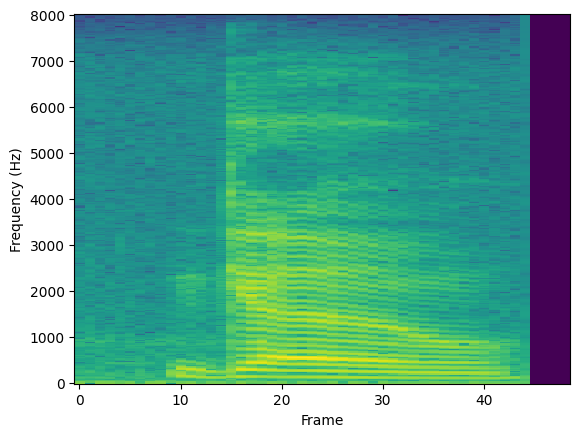

In [ ]:
import matplotlib.pyplot as plt

log_spectrogram = tf.math.log(spectrogram + 1.e-6)

# Matplotlib requires (Y, X) data for a correct visualization
log_spectrogram_vis = tf.transpose(log_spectrogram)


frames = np.arange(0, log_spectrogram.shape[0])
frequencies = np.linspace(0, sampling_rate // 2, log_spectrogram.shape[1])
plt.pcolormesh(frames, frequencies, log_spectrogram_vis.numpy())
plt.xlabel('Frame')
plt.ylabel('Frequency (Hz)')
plt.show()

# Mel spectrogram

In [ ]:
num_spectrogram_bins = spectrogram.shape[1] # frame_length // 2 + 1
num_mel_bins = 64
lower_frequency = 20
upper_frequency = 4000

linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
    num_mel_bins=num_mel_bins,
    num_spectrogram_bins=num_spectrogram_bins,
    sample_rate=sampling_rate,
    lower_edge_hertz=lower_frequency,
    upper_edge_hertz=upper_frequency
)
print('Mel Filters Matrix shape:', linear_to_mel_weight_matrix.shape)

mel_spectrogram = tf.matmul(spectrogram, linear_to_mel_weight_matrix)

print('Mel Spectrogram shape:', mel_spectrogram.shape)

log_mel_spectrogram = tf.math.log(mel_spectrogram + 1.e-6)

Mel Filters Matrix shape: (321, 64)
Mel Spectrogram shape: (49, 64)


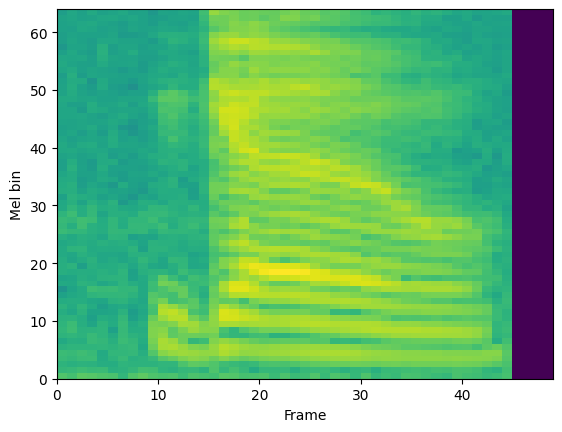

[  20.           41.7631939    64.18421643   87.28295154  111.07988422
  135.59611865  160.85339692  186.8741183   213.68135914  241.29889329
  269.75121319  299.06355165  329.26190414  360.37305192  392.42458572
  425.44493028  459.4633695   494.51007247  530.61612014  567.81353298
  606.13529929  645.61540454  686.28886144  728.19174102  771.36120462
  815.83553683  861.65417949  908.85776659  957.48816039 1007.58848848
 1059.20318206 1112.37801535 1167.16014614 1223.59815768 1281.7421017
 1341.64354284 1403.35560437 1466.93301529 1532.43215888 1599.9111227
 1669.42975009 1741.04969326 1814.83446798 1890.84950987 1969.16223245
 2049.84208692 2132.96062378 2218.59155624 2306.81082562 2397.69666871
 2491.32968712 2587.79291876 2687.17191154 2789.55479917 2895.03237934
 3003.69819428 3115.64861366 3230.98292011 3349.80339721 3472.21542027
 3598.3275497  3728.25162736 3862.10287572 4000.        ]


In [ ]:
# Matplotlib requires (Y, X) data for a correct visualization
log_mel_spectrogram_vis = tf.transpose(log_mel_spectrogram)

frames = np.arange(0, log_spectrogram.shape[0])
lower_mel_frequency = 2595 * np.log10(1 + lower_frequency / 700)
upper_mel_frequency = 2595 * np.log10(1 + upper_frequency / 700)
mel_frequencies = np.linspace(lower_mel_frequency, upper_mel_frequency, num_mel_bins)
frequencies = 700 * (10.0 ** (mel_frequencies / 2595.0) - 1.0)
plt.pcolormesh(log_mel_spectrogram_vis.numpy())
plt.xlabel('Frame')
plt.ylabel('Mel bin')
plt.show()

print(frequencies)

# Mel-Frequency Cepstral Coefficients (MFCCs)

In [ ]:
mfccs = tf.signal.mfccs_from_log_mel_spectrograms(log_mel_spectrogram)
print('MFCCs shape:', mfccs.shape)


MFCCs shape: (49, 64)


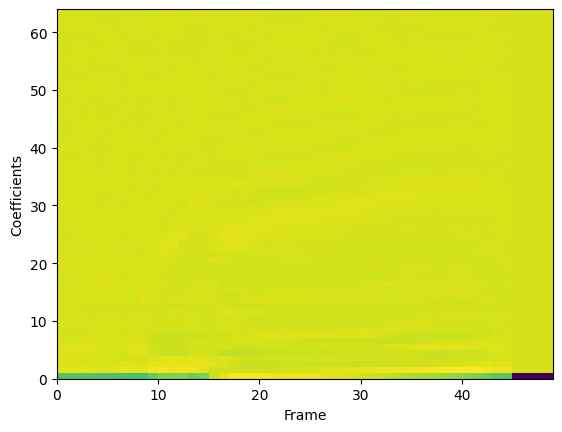

In [ ]:
mfccs_vis = tf.transpose(mfccs)

plt.pcolormesh(mfccs_vis.numpy())
plt.xlabel('Frame')
plt.ylabel('Coefficients')
plt.show()

In [ ]:
num_coefficients = 10
mfccs = mfccs[..., :num_coefficients]

print('MFCCs shape:', mfccs.shape)

MFCCs shape: (49, 10)


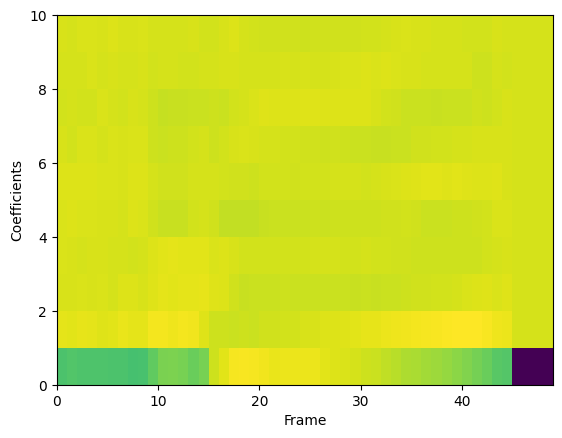

In [ ]:
mfccs_vis = tf.transpose(mfccs)

plt.pcolormesh(mfccs_vis.numpy())
plt.xlabel('Frame')
plt.ylabel('Coefficients')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6f1fd91f-a434-4542-983d-3ce5ae14ac33' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>